In [5]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-03-31 17:13:32--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-31 17:13:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-31 17:13:33--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [64]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 47kB/s 
     |████████████████████████████████| 491kB 61.4MB/s 
     |████████████████████████████████| 3.2MB 51.2MB/s 
  Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


In [1]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string


from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
tweet= pd.read_csv('/content/train.csv')
# test=pd.read_csv('nlp-getting-started/test.csv')

In [0]:
# # From https://www.kaggle.com/wrrosa/keras-bert-using-tfhub-modified-train-data - 
# # author of this kernel read tweets in training data and figure out that some of them have errors:
# ids_with_target_error = [328,443,513,2619,3640,3900,4342,5781,6552,6554,6570,6701,6702,6729,6861,7226]
# tweet.loc[tweet['id'].isin(ids_with_target_error),'target'] = 0
# tweet[tweet['id'].isin(ids_with_target_error)]

In [7]:
print('There are {} rows and {} columns in the dataset'.format(tweet.shape[0],tweet.shape[1]))

There are 8361 rows and 5 columns in the dataset


In [8]:
tweet.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [0]:
#Checking classs distribution

In [0]:
# extracting the number of examples of each class
Real_len = tweet[tweet['target'] == 1].shape[0]
Not_len = tweet[tweet['target'] == 0].shape[0]

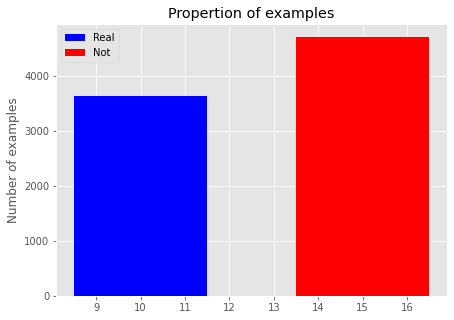

In [11]:
# bar plot of the 3 classes
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real", color='blue')
plt.bar(15,Not_len,3, label="Not", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

In [0]:
#Number of characters in tweets
def length(text):    
    '''a function which returns the length of text'''
    return len(text)


In [0]:
tweet['length'] = tweet['text'].apply(length)

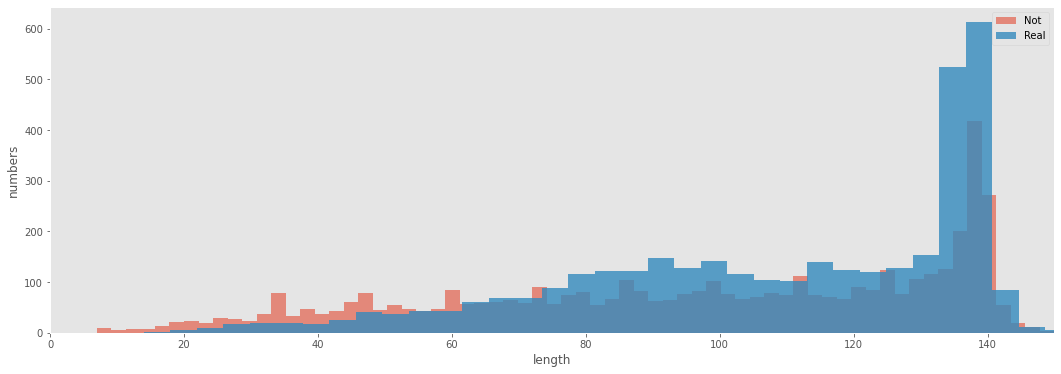

In [14]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(tweet[tweet['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(tweet[tweet['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

In [15]:
tweet.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


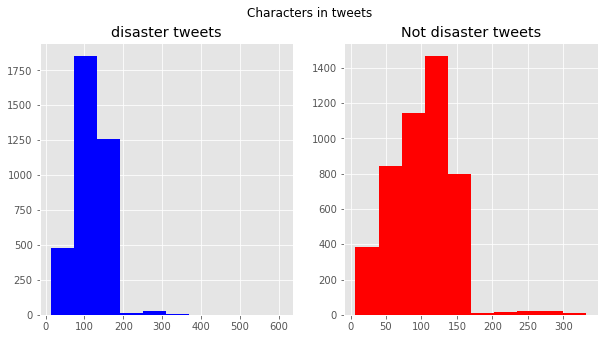

In [16]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=tweet[tweet['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=tweet[tweet['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

In [0]:
#The distribution of both seems to be almost same.120 t0 140 characters in a tweet are the most common among both.

In [0]:
#Number of words in a tweet

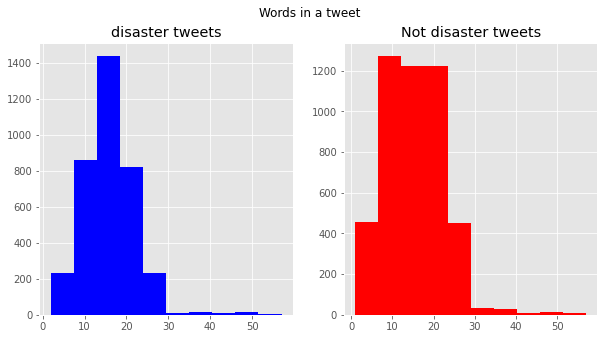

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=tweet[tweet['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=tweet[tweet['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

In [0]:
#Average word length in a tweet

Text(0.5, 0.98, 'Average word length in each tweet')

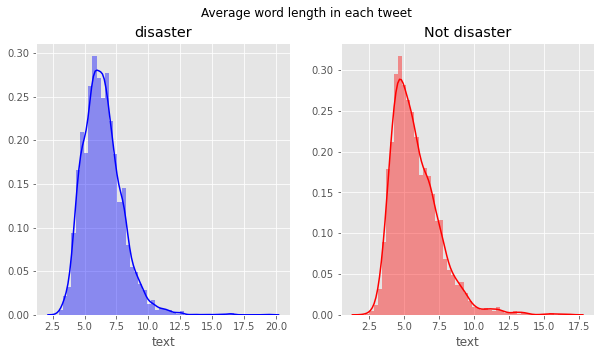

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=tweet[tweet['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('disaster')
word=tweet[tweet['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

In [0]:
def create_corpus(target):
    corpus=[]
    
    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [0]:
def create_corpus_df(tweet, target):
    corpus=[]
    
    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [0]:
#Common stopwords in tweets
#First we will analyze tweets with class 0.

In [0]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

In [26]:
# displaying the stopwords
np.array(stop)

array({'them', 'that', 'each', 'her', 'did', "shouldn't", 'ourselves', 'down', 'him', 'herself', 'here', 'doesn', 'being', 'again', 'shan', 'won', "weren't", 'up', 'on', "haven't", "it's", "should've", 'all', 'because', 'can', 'if', 'wouldn', 're', 'whom', "don't", 'for', 'and', 'does', "didn't", 'there', 'y', "you're", 'its', 'against', 'so', "needn't", 'is', 'aren', 'wasn', 'yourself', 'my', 'or', 'than', 'any', "wasn't", 'who', 'when', "shan't", 'needn', 've', 'during', 'doing', 'shouldn', 'll', 'between', 'had', "that'll", 'where', 'own', 'have', 'they', 'too', "isn't", 'your', 'been', 'about', 'itself', 'from', 'yourselves', 'a', 'with', 'should', 'off', 'both', 'those', 'but', 'why', 'am', "aren't", "hadn't", 'above', 'then', 'm', 'after', 'other', 'nor', 'which', 'do', "you've", "doesn't", 'most', 'just', 'below', 'ain', 'how', 'not', 'hasn', 'be', 'yours', 'theirs', 'no', 'themselves', 'only', 'you', "won't", 'this', "you'll", 'she', 'his', 'further', 'it', 'into', "mightn't", 

<BarContainer object of 10 artists>

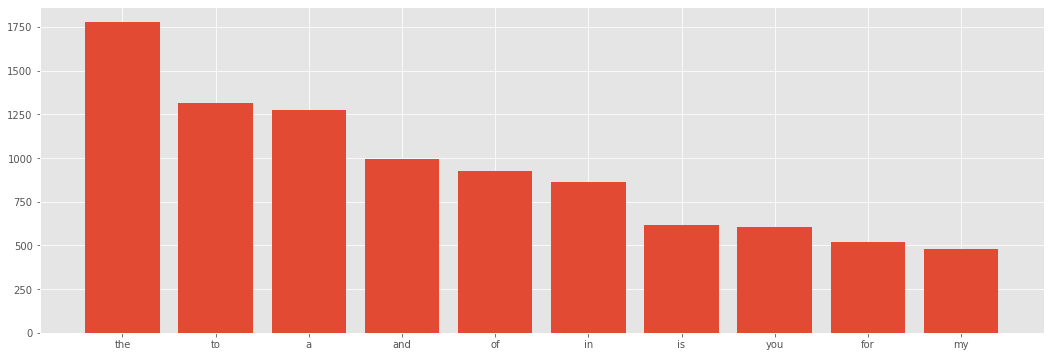

In [27]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

In [0]:
#Now,we will analyze tweets with class 1.

<BarContainer object of 10 artists>

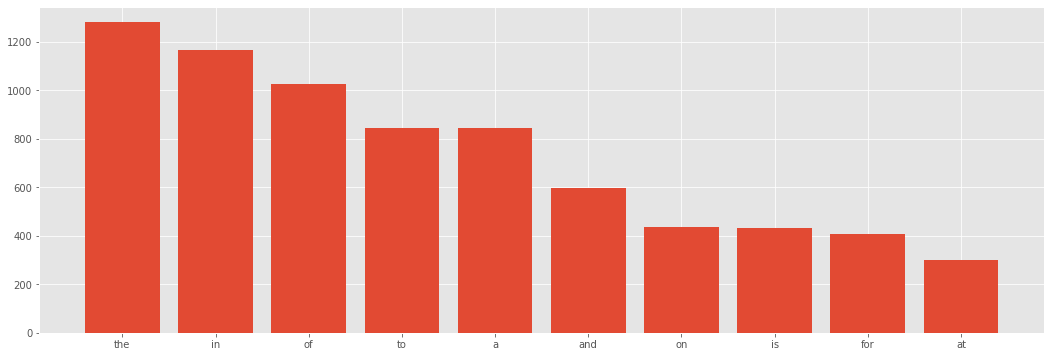

In [29]:
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

In [0]:
#In both of them,"the" dominates which is followed by "a" in class 0 and "in" in class 1.

#Analyzing punctuations
#First let's check tweets indicating real disaster.

<BarContainer object of 18 artists>

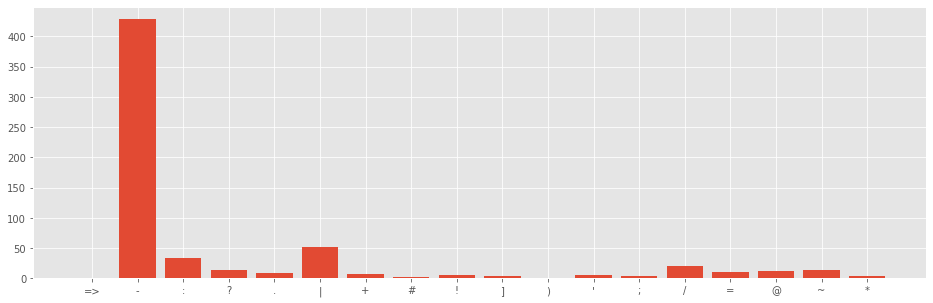

In [31]:
plt.figure(figsize=(16,5))
corpus=create_corpus(1)

dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 23 artists>

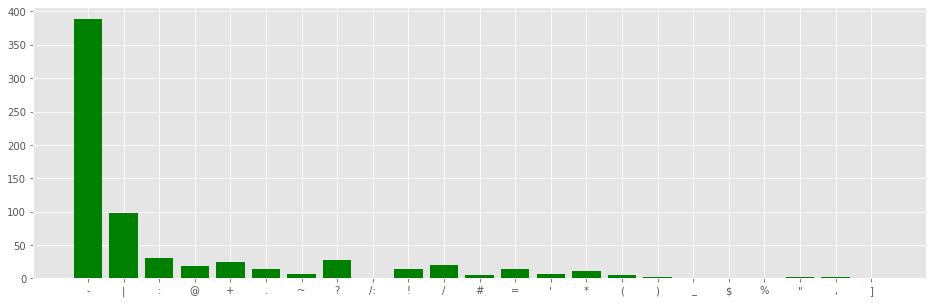

In [32]:
plt.figure(figsize=(16,5))
corpus=create_corpus(0)
dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')

In [33]:
plt.figure(figsize=(16,5))
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<Figure size 1152x360 with 0 Axes>

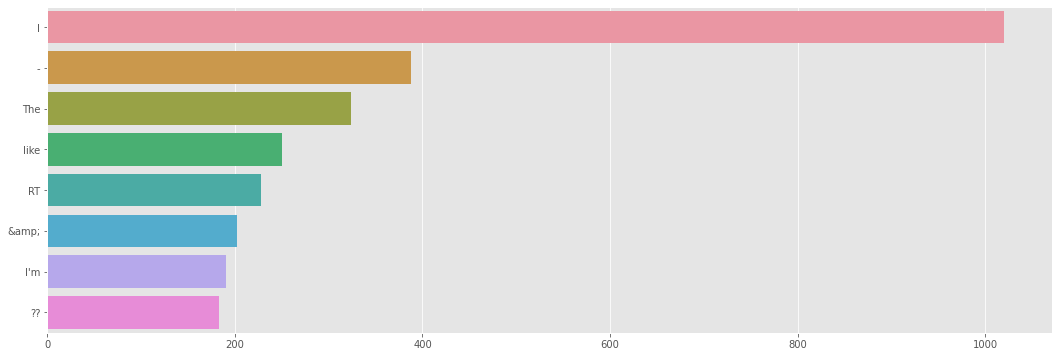

In [34]:
sns.barplot(x=y,y=x)

In [0]:
#n-gram analysis bi-gram
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

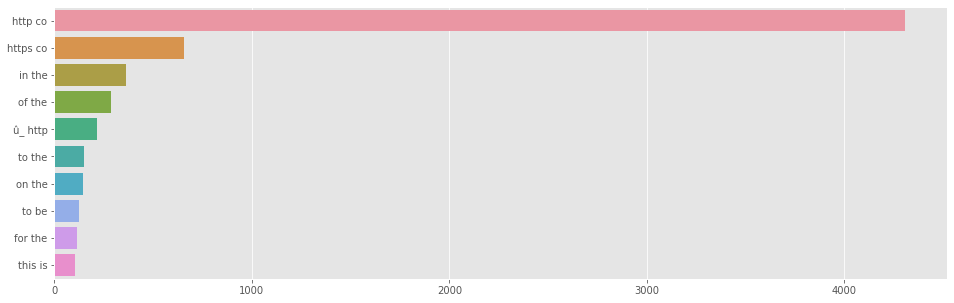

In [36]:
plt.figure(figsize=(16,5))
top_tweet_bigrams=get_top_tweet_bigrams(tweet['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [37]:
df=tweet
df.shape

(8361, 6)

In [0]:
#Removing URLs
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

df['text']=df['text'].apply(lambda x : remove_URL(x))


In [0]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

df['text']=df['text'].apply(lambda x : remove_html(x))

In [0]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['text']=df['text'].apply(lambda x: remove_emoji(x))

In [0]:
#removing punctuations

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

df['text']=df['text'].apply(lambda x : remove_punct(x))

In [42]:
df.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1,38
2,5,NaN,NaN,All residents asked to shelter in place are be...,1,133
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,65
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1,88


In [43]:
#Word Cloud
#for real disaster
corpus_new1=create_corpus_df(df,1)
len(corpus_new1)

54204

In [44]:
corpus_new1[:10]

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 'earthquake',
 'May',
 'ALLAH']

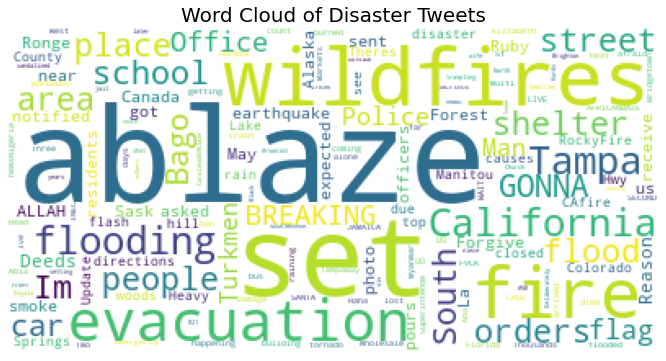

In [45]:
# Generating the wordcloud with the values under the category dataframe
plt.figure()
word_cloud = WordCloud(
                          background_color='white',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new1[:300]))
plt.imshow(word_cloud)
plt.title('Word Cloud of Disaster Tweets',fontsize=20)
plt.axis('off')
plt.show()

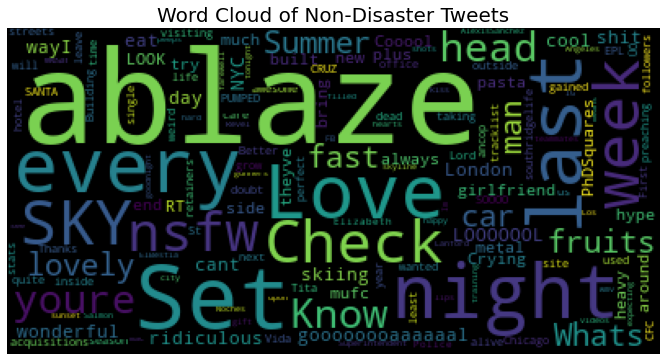

In [46]:
#not disaster
corpus_new0=create_corpus_df(df,0)
len(corpus_new0)

corpus_new0[:10]

# Generating the wordcloud with the values under the category dataframe
plt.figure()
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new0[:300]))
plt.imshow(word_cloud)
plt.title('Word Cloud of Non-Disaster Tweets',fontsize=20)
plt.axis('off')
plt.show()

In [47]:
df.head(10)

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1,38
2,5,NaN,NaN,All residents asked to shelter in place are be...,1,133
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,65
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1,88
5,8,NaN,NaN,RockyFire Update California Hwy 20 closed in ...,1,110
6,10,NaN,NaN,flood disaster Heavy rain causes flash floodin...,1,95
7,13,NaN,NaN,Im on top of the hill and I can see a fire in ...,1,59
8,14,NaN,NaN,Theres an emergency evacuation happening now i...,1,79
9,15,NaN,NaN,Im afraid that the tornado is coming to our area,1,52


In [0]:
#bag of word counts
def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = df["text"].tolist()
list_labels = df["target"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

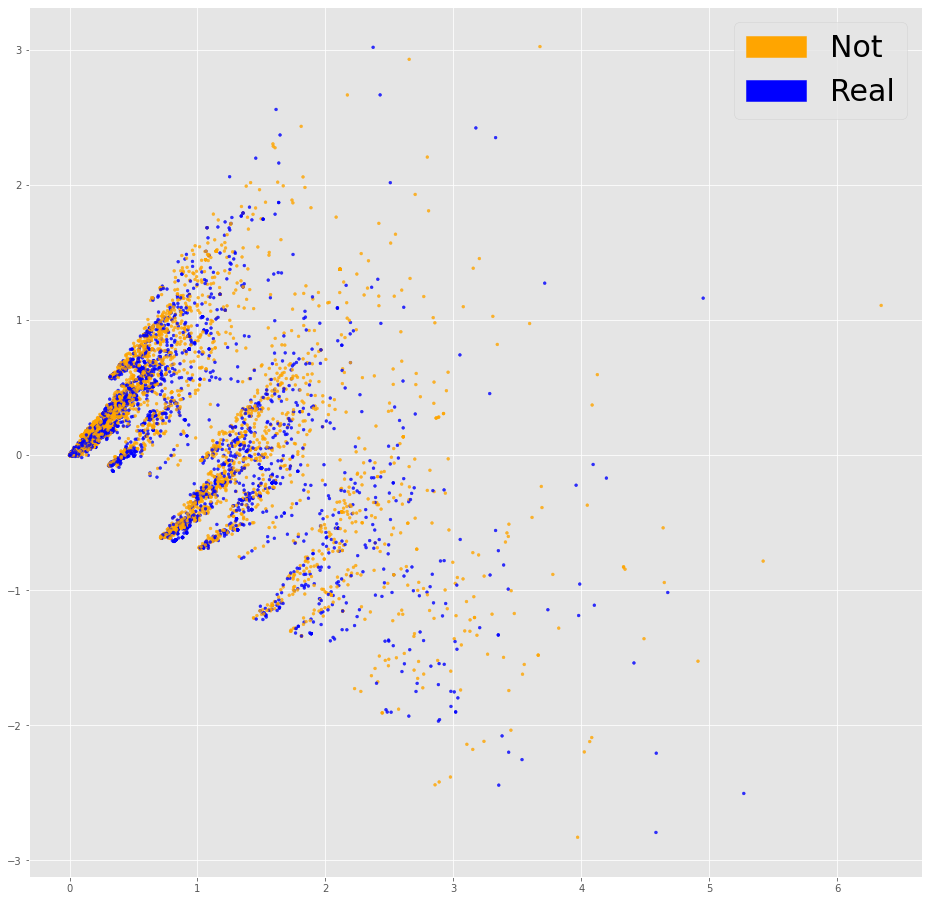

In [49]:
#Visualizing the embeddings
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Not')
            blue_patch = mpatches.Patch(color='blue', label='Real')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})

fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

In [0]:
# TF - IDF

def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

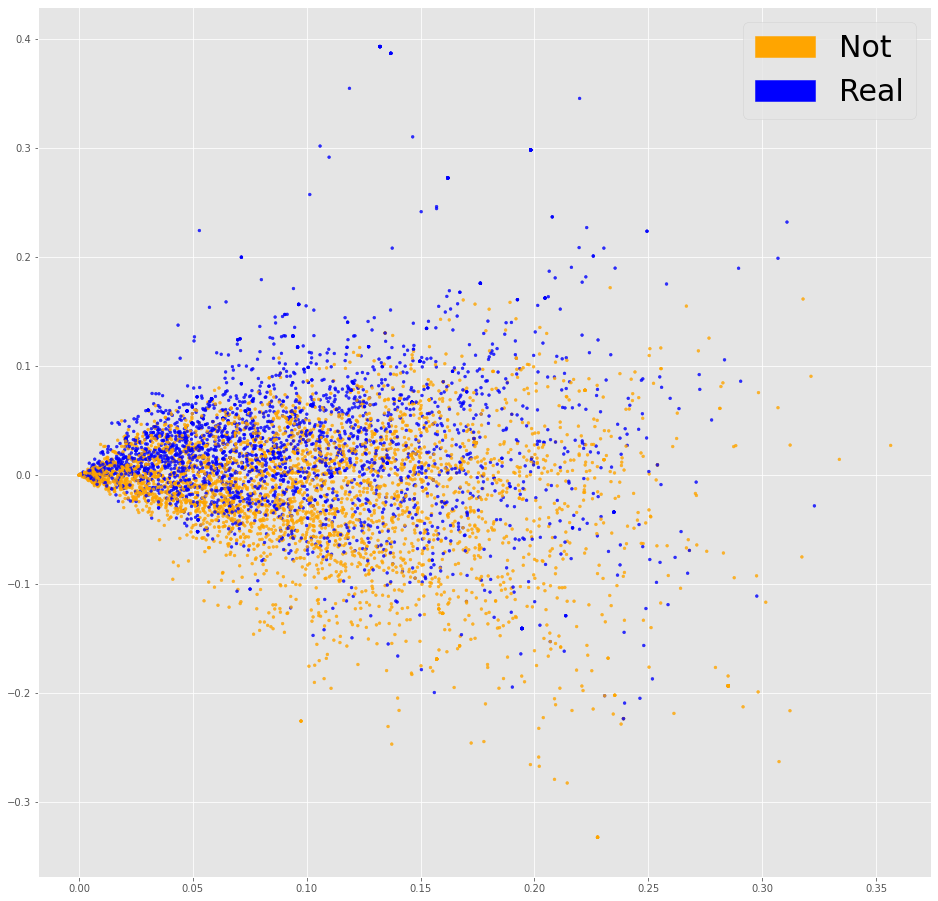

In [51]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [0]:
def create_corpus_new(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet)]
        corpus.append(words)
    return corpus 

In [53]:
corpus=create_corpus_new(df)

100%|██████████| 8361/8361 [00:01<00:00, 7732.03it/s]


In [0]:
embedding_dict={}
with open('/content/glove.6B.100d.txt','r', encoding="utf8") as f:
    for line in f:
        values=line.split()
        word = values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [0]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [102]:
tweet_pad.shape

(8361, 50)

In [103]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 19799


In [104]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i < num_words:
        emb_vec=embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i]=emb_vec     

100%|██████████| 19799/19799 [00:00<00:00, 575971.71it/s]


In [0]:
#baseline model
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(lr=3e-4)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [107]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 100)           1980000   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 2,060,501
Trainable params: 80,501
Non-trainable params: 1,980,000
_________________________________________________________________


In [0]:
train=tweet_pad[:tweet.shape[0]]
# test=tweet_pad[tweet.shape[0]:]

In [109]:
train.shape

(8361, 50)

In [110]:
X_train,X_test,y_train,y_test=train_test_split(train,tweet['target'].values,test_size=0.2)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6688, 50)
Shape of Validation  (1673, 50)


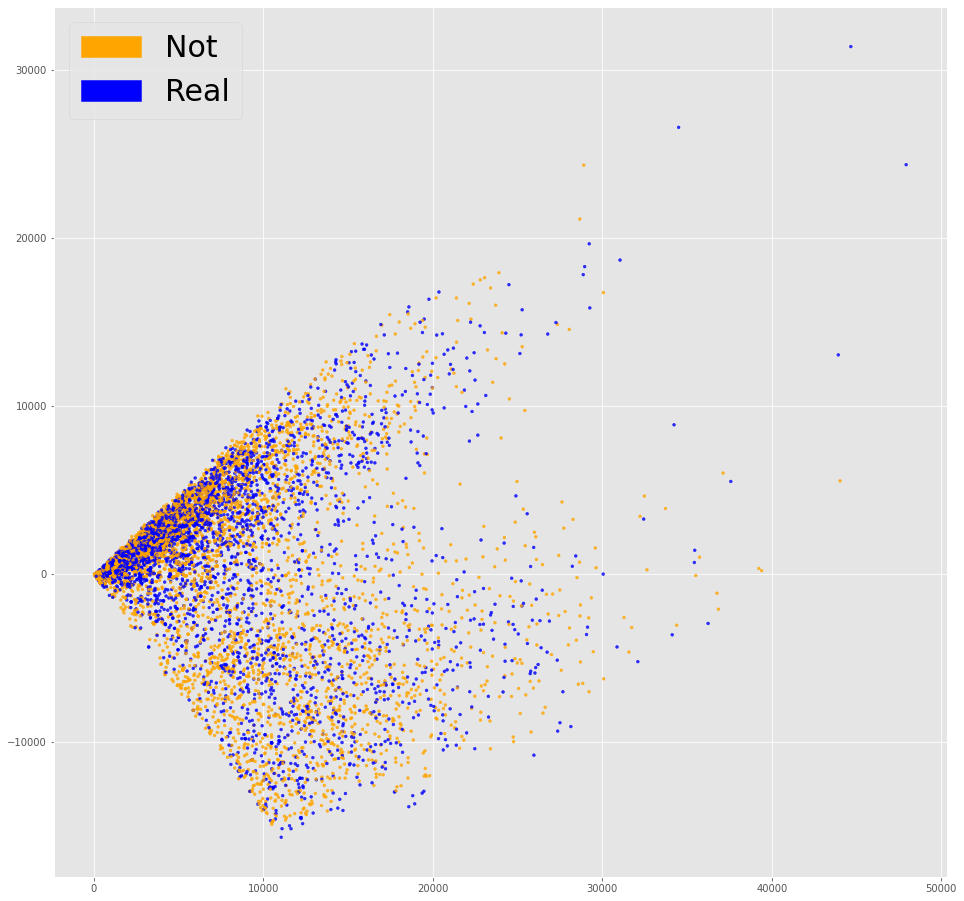

In [111]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(train,tweet['target'])
plt.show()

In [113]:
# Recomended 10-20 epochs
history = model.fit(X_train,y_train,batch_size=16,epochs=10,validation_data=(X_test,y_test),verbose=2)

Train on 6688 samples, validate on 1673 samples
Epoch 1/10
 - 16s - loss: 0.5599 - acc: 0.7395 - val_loss: 0.5172 - val_acc: 0.7687
Epoch 2/10
 - 16s - loss: 0.5468 - acc: 0.7449 - val_loss: 0.5099 - val_acc: 0.7729
Epoch 3/10
 - 16s - loss: 0.5415 - acc: 0.7425 - val_loss: 0.5099 - val_acc: 0.7663
Epoch 4/10
 - 16s - loss: 0.5349 - acc: 0.7522 - val_loss: 0.5157 - val_acc: 0.7770
Epoch 5/10
 - 16s - loss: 0.5223 - acc: 0.7576 - val_loss: 0.4949 - val_acc: 0.7705
Epoch 6/10
 - 16s - loss: 0.5142 - acc: 0.7633 - val_loss: 0.4996 - val_acc: 0.7747
Epoch 7/10
 - 16s - loss: 0.5203 - acc: 0.7572 - val_loss: 0.5009 - val_acc: 0.7639
Epoch 8/10
 - 16s - loss: 0.5078 - acc: 0.7658 - val_loss: 0.4938 - val_acc: 0.7770
Epoch 9/10
 - 16s - loss: 0.5103 - acc: 0.7576 - val_loss: 0.4877 - val_acc: 0.7741
Epoch 10/10
 - 16s - loss: 0.5050 - acc: 0.7663 - val_loss: 0.4894 - val_acc: 0.7794


In [0]:
yhat_probs = model.predict(X_test) #predict on test
yhat_classes = yhat_probs.round().astype('int')

In [139]:
yhat_probs[:10,-1]

array([0.16318971, 0.20095357, 0.3247918 , 0.16004503, 0.16059706,
       0.91719306, 0.4138793 , 0.15793225, 0.24288043, 0.163151  ],
      dtype=float32)

In [140]:
yhat_classes[:10,-1]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [141]:
print(classification_report(y_test, yhat_classes, target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.75      0.90      0.82       926
     Class 1       0.84      0.63      0.72       747

    accuracy                           0.78      1673
   macro avg       0.79      0.77      0.77      1673
weighted avg       0.79      0.78      0.77      1673



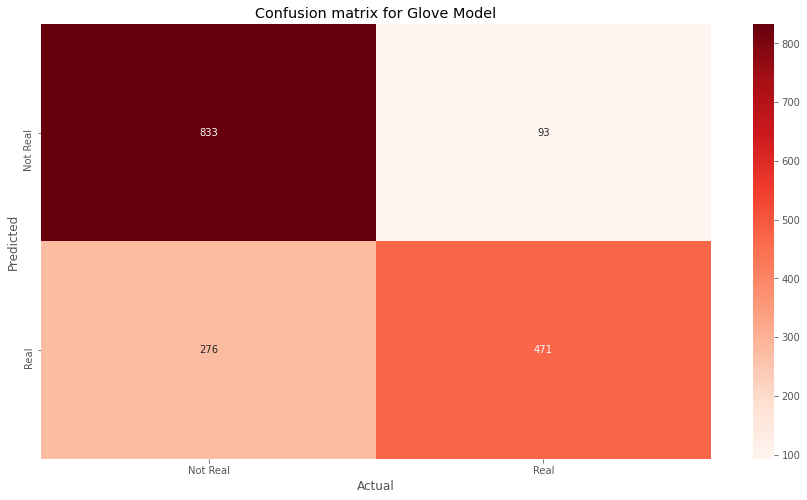

In [154]:
# aux_df = data[['target', 'target']].drop_duplicates().sort_values('target')
conf_matrix = confusion_matrix(y_test, yhat_classes)
plt.figure(figsize=(15,8))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=['Not Real','Real'], 
            yticklabels=['Not Real','Real'],
            cmap="Reds",
           fmt='g')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix for Glove Model')
plt.show()

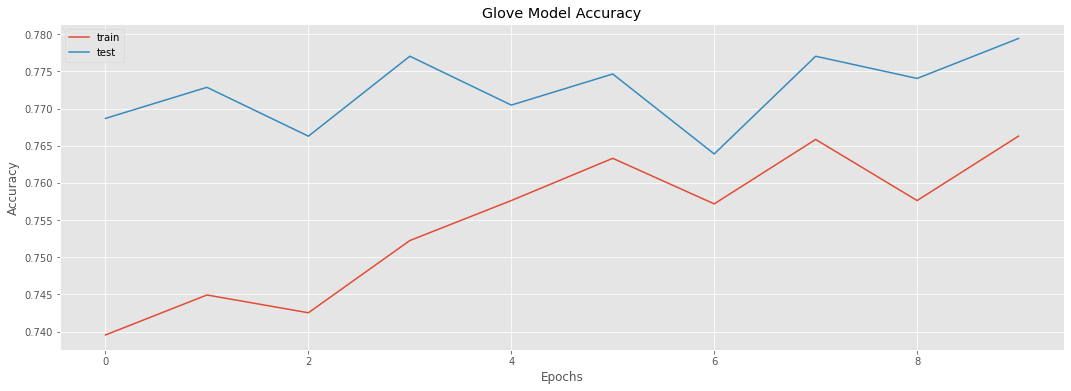

In [143]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Glove Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

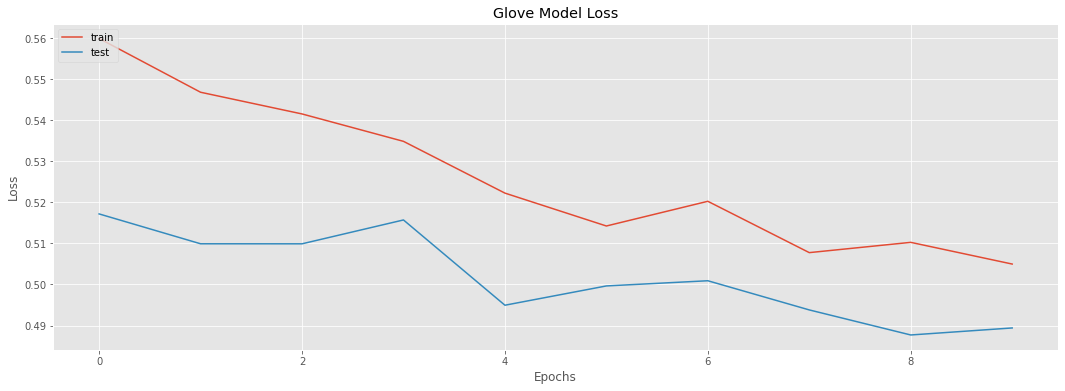

In [144]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Glove Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()